In [1]:
import pandas as pd

direct = "Wave 2 Spring 2021/Surveys/SPSS/"

df = pd.read_spss(direct+"Survey-SPSS-Spring-2021-Ukraine.sav")

df.columns = [c.lower() for c in df.columns]
df = df.rename(columns={'weight':'Weight'})

cols = [c for c in df.columns if c.startswith('q1_')] + [c for c in df.columns if c.startswith('q2_')] 
df_temp = df[cols].values
df_temp[df_temp == 'Yes'] = 'Mentioned'
df_temp[df_temp == 'No'] = 'Not Mentioned'
df[cols] = df_temp

In [2]:
df['q10'].unique()

[Joining the European Union, Improving relations with Russia, Hard to say/DK, Refusal to answer]
Categories (4, object): [Joining the European Union, Improving relations with Russia, Hard to say/DK, Refusal to answer]

In [3]:
print('number of participants: ', df.shape[0])
print('number of entries: ', df.shape[1])

number of participants:  2000
number of entries:  41


from scipy.stats import chisquare

df = df.drop(['id','Weight','d1'],1)

df=df.apply(lambda x : pd.factorize(x)[0])+1

chi = pd.DataFrame([chisquare(df[x].values,f_exp=df.values.T,axis=1)[0] for x in df])

chi.columns = df.columns
chi.index = df.columns


for col in chi.columns:
    print('--------------------------------------')
    print(col)
    print('--------------------------------------')
    print('negative correlations')
    print('--------------------------------------')
    print(chi[col].sort_values(ascending=True)[:40])
    print('oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo')
    print('oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo')

What does the "weight" column mean?

In [4]:
entries = df.columns

for e in entries:
    print('unique responses to question: ', e)
    unique_responses = df[e].unique()
    print(unique_responses)
    print('number of unique responses: ', len(unique_responses))
    
    print('------------------------------------------')

unique responses to question:  n_ank
[1.000e+00 2.000e+00 3.000e+00 ... 1.998e+03 1.999e+03 2.000e+03]
number of unique responses:  2000
------------------------------------------
unique responses to question:  p3
[Vinnytsya, Volyn, Dnipropetrovsk, Donetsk, Zhytomyr, ..., Khmelnytsky, Cherkasy, Chernivtsy, Chernihiv, Kyiv city]
Length: 25
Categories (25, object): [Vinnytsya, Volyn, Dnipropetrovsk, Donetsk, ..., Cherkasy, Chernivtsy, Chernihiv, Kyiv city]
number of unique responses:  25
------------------------------------------
unique responses to question:  q1_1
['Mentioned' 'Not Mentioned']
number of unique responses:  2
------------------------------------------
unique responses to question:  q1_2
['Mentioned' 'Not Mentioned']
number of unique responses:  2
------------------------------------------
unique responses to question:  q1_3
['Not Mentioned' 'Mentioned']
number of unique responses:  2
------------------------------------------
unique responses to question:  q1_4
['Mentione

In [5]:
df_onehot = df.drop(['Weight','d1'],1)#'id',
df_onehot = pd.get_dummies(df_onehot)
df_corr = df_onehot.corr()

#removes self correaltions from the dataframe
df_corr[df_corr == 1.] = None
df_corr[df_corr == -1.] = None

top_list= 10

for col in df_corr.columns[20:]:
    print('--------------------------------------')
    print(col)
    print('--------------------------------------')
    print('negative correlations')
    print('--------------------------------------')
    print(df_corr[col].sort_values(ascending=True)[:top_list])
    print('--------------------------------------')
    print('positive correlations')
    print('--------------------------------------')
    print(df_corr[col].sort_values(ascending=False)[:top_list])
    print('oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo')
    print('ooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo')

--------------------------------------
p3_Ternopil
--------------------------------------
negative correlations
--------------------------------------
d4_Central                                          -0.122989
d10_Fluent spoken, read and written                 -0.112742
d4_South                                            -0.096181
q1_1_Not Mentioned                                  -0.084770
q2_1_Not Mentioned                                  -0.081741
q10_Improving relations with Russia                 -0.078931
d4_East                                             -0.067142
d9_Ukrainian Orthodox Church  Moscow Patriarchate   -0.051884
p3_Dnipropetrovsk                                   -0.051088
d9_Secular/Nonreligious/Agnostic/Atheist/None       -0.048662
Name: p3_Ternopil, dtype: float64
--------------------------------------
positive correlations
--------------------------------------
d4_West                                                       0.278268
d9_Greek Catholic       

p3_Chernivtsy                                   0.161327
q9_They hurt Ukraine                            0.089206
d4_West                                         0.081651
p3_Ivano-Frankivsk                              0.079937
q5_The role of the U.S. will become stronger    0.076000
q6_Disagree                                     0.074027
n_ank                                           0.071750
q10_Joining the European Union                  0.065169
d6_Ukrainian                                    0.057806
d9_Greek Catholic                               0.052402
Name: q8_Empathy toward the protests (, dtype: float64
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
ooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
--------------------------------------
q8_Indifference toward the protests
--------------------------------------
negative correlations
--------------------------------

Name: d8_We can afford almost anything, dtype: float64
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
ooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
--------------------------------------
d8_We can buy a car, but we cannot say that we can afford anything
--------------------------------------
negative correlations
--------------------------------------
d8_We have enough money for food and clothing, but buying more expensive goods –  like TV or fridge causes problems for us   -0.133939
d8_We have enough money for food, but not for clothing                                                                       -0.113952
age_50 years and older                                                                                                       -0.103746
d8_We do not have enough money even for food                                                                                 -0

People who think that these events will not effect the U.S:
- highly educated
- THinks RUssan policies hurt belarus
- do not trust Belarussian mass media 
- join the EU (quesiton 10, weird)
- heard about the riot from online mass media 
- Heard a lot about the riot
- COnsume online digital media
- tend to be upper and middle managers
- Support and empahy towards the RUssian protestors 
- No trust or consumption in belarussian mass media
- consumption of online Belarussian media


People who think this will make the U.S weaker tend to.
- Watch and trust mass media from Russia
- Watch and Trust Belarussian media
- Not question 10 (possibly joining the European union)
- mixed feelings over Russian protests 
- Thinks Russian benefits Belarus 
- IMpriving relations with RUssia, not joining EU should be priortiy (question 10)
- Heard about the riot in traditioanl media 
- Be older than 50years
- Strongly agree that RUssia is handling the pandemic





people who think this will make the U.S stronger tend to:
- Question 10! (possibly joining the European union)
- Thinks Russian policies harm Belarus (weak correaltion 0.1)



people who Don't know how this will effect the U.S tend to:
- Have not heard about it
- DO not have opinion about whether Russian or the West are doing well during the COVID-19 pandemic
- DO not have an opinion about how RUssian is affecting belarussian politics 
- not had higher university education
- be female
- have no opinion about the protests
- not heard a little about it
- not consume tradtional media




people who have heard a little about the capital riot tend to:
- heard about it through traditional media (strong correaltion)
- but also online mass media and friends and family
- Think the events will not effect the uS., but less so than the people eho heard a lot a bout it.

people who have heard nothing about the capitol riot:
- are younger than 50, tend to be 18-29 years old
- do not have higher university education
- are indifferent towards the protests
- DO not think they hurt Belarus, they don't know
- Do not use social media
- DOn;t know what they think about it

people who have heard a lot a out the protest tend to:
- Have heard about it from youtube and traditional media
- Think the events won't effect the U.S
- are male
- think protests hurt Belarus
- have higher university education






In [6]:
dem_decode = {'d1': 'age_maybe', #age 
'd2': 'gender',
'd3': 'education',
'd4': 'region',
'd5': 'region_type',
 'dd5': 'region_type2',
 'd6': 'nationaility_maybe', #'nationaility'
 'd7': 'employment',
 'd8': 'subsistence',
 'd9': 'religion',
 'd10': 'Russian_language_maybe', #Russian 
  'weight': '8 weights when taking averages',
'age': 'age categories'
}

questions = [q for q in df.columns if q.startswith('q')]

normal_media_consumption = dict(zip(['q1_1',
 'q1_2',
 'q1_3',
 'q1_4',
 'q1_5',
 'q1_6',
 'q1_7',
 'q1_98',
 'q1_99'],
[
    'What are your major sources of information: National Mass Media',
    'What are your major sources of information: Social Media',
    'What are your major sources of information: Russian Media',
    'What are your major sources of information: National Digital media',
    'What are your major sources of information: Russian Digital media',
    'What are your major sources of information: People you Know',
    'What are your major sources of information: Other Sources',
    'What are your major sources of information: Hard to Say',
    'What are your major sources of information: Refuse to Answer'
    
]))

trust_media_consumption = dict(zip(['q2_1',
 'q2_2',
 'q2_3',
 'q2_4',
 'q2_5',
 'q2_6',
 'q2_7',
 'q2_98',
 'q2_99'],
[
    'Among the most trusted information sources: National Mass Media',
    'Among the most trusted information sources: Social Media',
    'Among the most trusted information sources: Russian Media',
    'Among the most trusted information sources: National Digital media',
    'Among the most trusted information sources: Russian Digital media',
    'Among the most trusted information sources: People you Know',
    'Among the most trusted information sources: Other Sources',
    'Among the most trusted information sources: Hard to Say',
    'Among the most trusted information sources: Refuse to Answer'
    
]))


'''
is there a priming effect of putting the "From what kind of source did you first hear 
about the rioting in the U.S. Capitol?" before the question "How do you think this event will 
affect the role of the United States in global affairs?"
'''


capitol_riots_questions = dict(
zip(
    ['q3', 'q4', 'q5'],
    ['How much have you heard about the rioting at the U.S Capitol?',
     'From what media source did you first hear about the rioting at the U.S Capitol',
    'How do you think the Capitol riot will affect the role of the United States in global affairs']
)
)


In [7]:
#i'm not sure what to do with question two, other than a robustness check for results from question one

In [8]:
for q in ['q3','q4','q5']:
    print('----------------------------------------------------------------------------------------------------')
    print(capitol_riots_questions[q])
    print('-----------------------------------------------------------------------------------------------------')
    print(df[q].value_counts())
    print(df[q].value_counts()/df[q].shape[0])
    #print('-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o')
    #print('-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o')
    print('')
    print('')

----------------------------------------------------------------------------------------------------
How much have you heard about the rioting at the U.S Capitol?
-----------------------------------------------------------------------------------------------------
Nothing at all             749
A little                   641
A lot                      579
Hard to say/ Don’t know     31
Name: q3, dtype: int64
Nothing at all             0.3745
A little                   0.3205
A lot                      0.2895
Hard to say/ Don’t know    0.0155
Name: q3, dtype: float64


----------------------------------------------------------------------------------------------------
From what media source did you first hear about the rioting at the U.S Capitol
-----------------------------------------------------------------------------------------------------
Traditional Media (i.e., newspapers, television, radio)    609
Facebook                                                   176
YouTube          

In [9]:
def plot_media_consumption_and_trust(ques_capitol, title, index_short, index_order, short_col, reorder_col, change_labels=False):

    for T in ['sources', 'trust']:

        question_filter = ['These events won’t affect the role of the U. S.',
             'The role of the U. S. will become weaker']

        df_r=df#[df['q5'].isin(question_filter)]

        if T == 'sources':
            df_r = df_r.rename(columns=normal_media_consumption)
            media_q = list(normal_media_consumption.values())[:-2]
            title2 = 'Ukraine: What are your major sources of information?'

        if T == 'trust':    
            df_r = df_r.rename(columns=trust_media_consumption)
            media_q = list(trust_media_consumption.values())[:-2]
            title2 = 'Ukraine: What are your most trusted news sources?'

        df_new_l = []
        for q in media_q:
            print(q)
            df1 = df_r[df_r[q] == 'Mentioned'].groupby([ques_capitol]).sum()

            #print(df1['Weight'])

            df_new_l.append(df1['Weight'])

        media_q_short = [m[m.find(':')+2:] for m in media_q]

        df_capitol = pd.concat(df_new_l,1)
        df_capitol.columns = media_q_short

        if change_labels:
            df_capitol.index = index_short
            df_capitol = df_capitol.loc[index_order]

            df_capitol.columns = short_col
            df_capitol = df_capitol[reorder_col]

        #df_capitol = df_capitol.loc[question_filter]
        #df_capitol.index = ['Won’t affect the U. S.', 'U. S. will become weaker']

        import seaborn as sns
        import matplotlib.pyplot as plt
        #fig, ax = plt.subplots()
        sns.set()

        df_capitol.T.plot(kind='bar', stacked=False)
        plt.title(title2)
        plt.legend( title=title,bbox_to_anchor=(1.0, 0.8))
        plt.show()


        #remove don't knows and normalzie
        df_capitol_dontknow_removed = df_capitol#.loc[df_capitol.index.values[1:]]
        df_capitol_dontknow_removed_normalized = df_capitol_dontknow_removed/df_capitol_dontknow_removed.sum()

        import seaborn as sns
        import matplotlib.pyplot as plt

        #fig, ax = plt.subplots()
        sns.set()

        df_capitol_dontknow_removed_normalized.T.plot(kind='bar', stacked=False)
        plt.title(title2)
        plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
        plt.ylabel('proportion')
        plt.show()
        
def plot_2d_breakdown(df, 
          ques_capitol, title, index_name, index_order,
         ques_target, title2, col_name, col_ordered, change_names=False):
    
    df_d=df.rename(columns = dem_decode)

    dem_decode

    df_d = (df.groupby([ques_capitol, ques_target]).sum()["Weight"]).unstack(level=1)

    if change_names == True:
        #reorder the columns
        df_d.index = index_name
        df_d = df_d.loc[index_order]

        df_d.columns = col_name
        df_d = df_d[col_ordered]

    df_d.T.plot(kind='bar', stacked=False)
    plt.title(title2)
    plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
    plt.ylabel('count')
    plt.show()

    df_d_prop = df_d/df_d.sum(0)

    df_d_prop.T.plot(kind='bar', stacked=False)
    plt.title(title2)
    plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
    plt.ylabel('proportion')
    plt.show()

In [15]:
import itertools
from scipy.stats import chi2_contingency
import os

ques_capitol = 'q5'
title = 'How will Capitol riot effect\n the standing of U.S?'


for T in ['sources', 'trust']:
    distance_metrics = []

    question_filter = ['These events won’t affect the role of the U. S.',
         'The role of the U. S. will become weaker']

    df_r=df#[df['q5'].isin(question_filter)]

    if T == 'sources':
        df_r = df_r.rename(columns=normal_media_consumption)
        media_q = list(normal_media_consumption.values())[:-2]
        title2 = 'Belarus: What are your major sources of information?'

    if T == 'trust':    
        df_r = df_r.rename(columns=trust_media_consumption)
        media_q = list(trust_media_consumption.values())[:-2]
        title2 = 'Belarus: What are your most trusted news sources?'

    df_new_l = []
    for q in media_q:
        #print(q)
        df1 = df_r[df_r[q] == 'Mentioned'].groupby([ques_capitol]).sum()

        #print(df1['Weight'])

        df_new_l.append(df1['Weight'])

    media_q_short = [m[m.find(':')+2:] for m in media_q]

    df_capitol = pd.concat(df_new_l,1)
    df_capitol.columns = media_q_short
    
    start = 'Social Media'

    comparison = ['Russian Media','Social Media', 'National Mass Media','National Digital media', 'Russian Digital media', 'People you Know']
    #print(df_capitol.columns.values)
    
    node = pd.DataFrame([range(len(comparison)), comparison],index=['Id','Label']).T

    for subset in itertools.combinations(comparison, 2):
        obs = df_capitol[[subset[0], subset[1]]]
        
        Id_source = node[node['Label'] == subset[0]]['Id'].values[0]
        Id_target = node[node['Label'] == subset[1]]['Id'].values[0]

        distance_metrics.append([ Id_source, Id_target, 'Undirected', chi2_contingency(obs)[0] ])

    dm_df = pd.DataFrame(distance_metrics)
    dm_df.columns = ['Source', 'Target', 'Type', 'Weight']

    directory = 'media_distance_metrics_US_standing_in_the_world/'+T+'/'+'Ukraine/'
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    node.to_csv(directory+'node.csv',index=False)
    dm_df.to_csv(directory+'edge.csv',index=False)

    #dm_df.sort_values('distance')

What are your major sources of information: National Mass Media
What are your major sources of information: Social Media
What are your major sources of information: Russian Media
What are your major sources of information: National Digital media
What are your major sources of information: Russian Digital media
What are your major sources of information: People you Know
What are your major sources of information: Other Sources


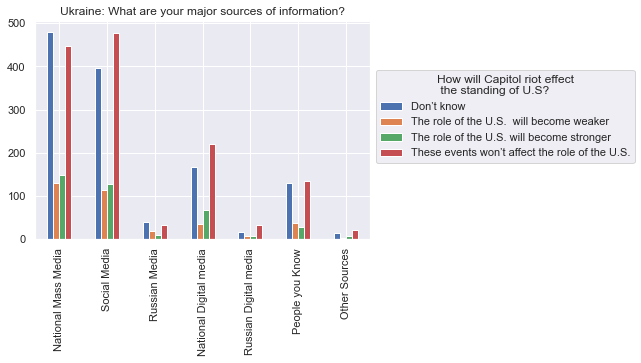

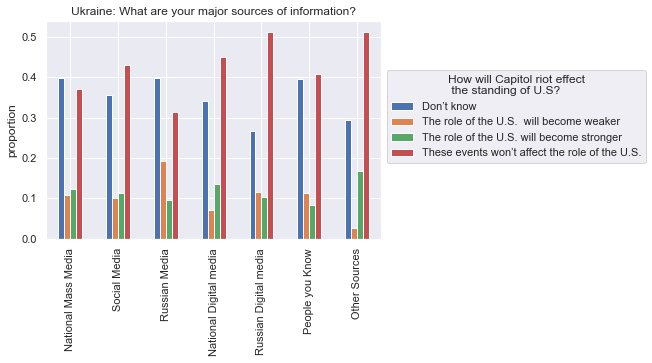

Among the most trusted information sources: National Mass Media
Among the most trusted information sources: Social Media
Among the most trusted information sources: Russian Media
Among the most trusted information sources: National Digital media
Among the most trusted information sources: Russian Digital media
Among the most trusted information sources: People you Know
Among the most trusted information sources: Other Sources


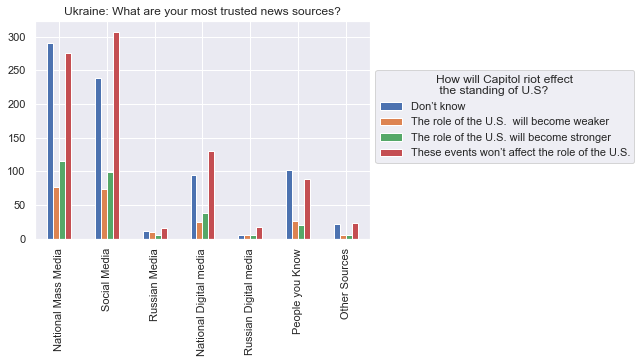

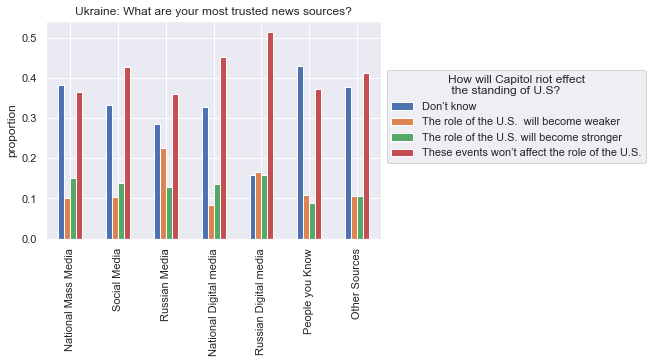

In [28]:
ques_capitol = 'q5'
title = 'How will Capitol riot effect\n the standing of U.S?'

index_short = ['Don’t know', 'U. S. will become stronger',
                    'U. S. will become weaker', 'Won’t affect the U. S.']

index_order = ['U. S. will become stronger','Won’t affect the U. S.',
                    'U. S. will become weaker',  'Don’t know'] 

short_col = ['National Mass Media', 'Russian Media', 'National Digital media', 'Russian Digital media',
 'Social Media','People you Know','Other Sources']

reorder_col = ['National Mass Media', 'Russian Media', 'National Digital media', 'Russian Digital media',
 'Social Media','People you Know','Other Sources']

plot_media_consumption_and_trust(ques_capitol, title, index_short, index_order, 
                                 short_col, reorder_col, change_labels=False)

ques_capitol = 'q3'
title = 'How much have you heard about\nthe riot at the U.S. Capitol?'

index_short = ['A little', 'A lot',  'Don’t know', 'Nothing at all']

index_order = ['A lot', 'A little', 'Nothing at all',  'Don’t know']

short_col = ['National Mass Media', 'Russian Media', 'National Digital media', 'Russian Digital media',
 'Social Media','People you Know','Other Sources']

reorder_col = ['National Mass Media', 'Russian Media', 'National Digital media', 'Russian Digital media',
 'Social Media','People you Know','Other Sources']


#plot_media_consumption_and_trust(ques_capitol, title, index_short, index_order, 
#                                 short_col, reorder_col, change_labels=True)



In [29]:
import matplotlib.pyplot as plt

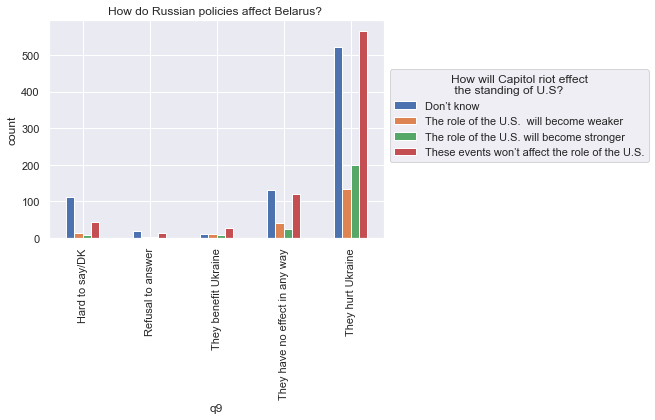

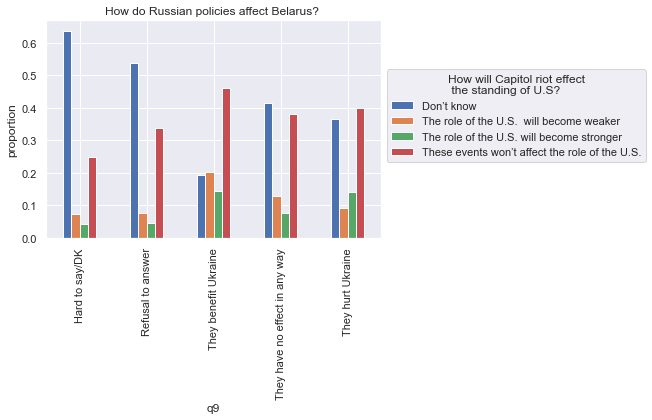

In [30]:
ques_capitol = 'q5'
title = 'How will Capitol riot effect\n the standing of U.S?'

index_name = ['Don’t know', 'U. S. will become stronger',
                    'U. S. will become weaker', 'Won’t affect the U. S.']

index_order = ['U. S. will become stronger','Won’t affect the U. S.',
                    'U. S. will become weaker',  'Don’t know']

ques_target = 'q9'
title2 = 'How do Russian policies affect Belarus? '

col_name = ['Hard to say', 'Refusal to answer',
                  'They benefit Belarus', 'No effect',
                  'They hurt Belarus']

col_ordered = ['They benefit Belarus', 'No effect',
                  'They hurt Belarus', 'Hard to say', 'Refusal to answer']

plot_2d_breakdown(df, 
          ques_capitol, title, index_name, index_order,
         ques_target, title2, col_name, col_ordered, change_names=False)


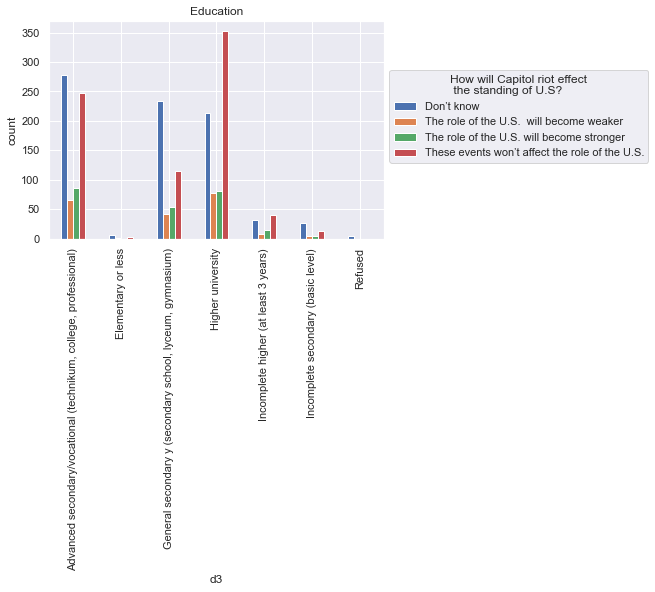

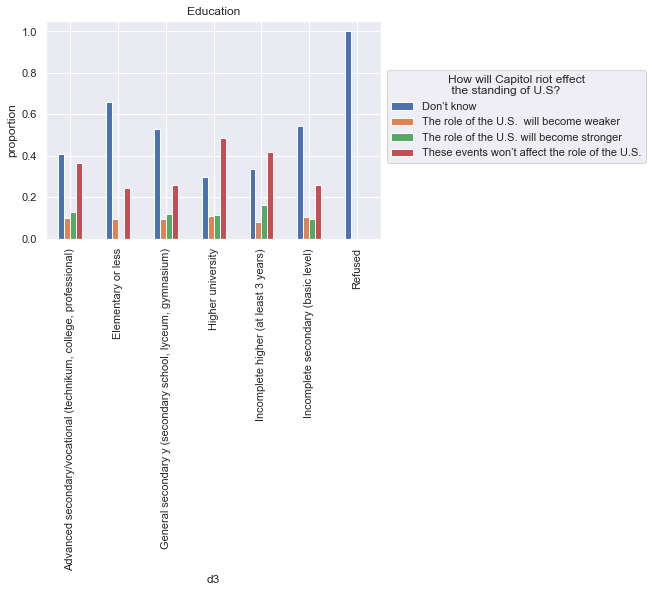

In [31]:
ques_capitol = 'q5'
title = 'How will Capitol riot effect\n the standing of U.S?'

index_name = ['Don’t know', 'U. S. will become stronger',
                    'U. S. will become weaker', 'Won’t affect the U. S.']

index_order = ['U. S. will become stronger','Won’t affect the U. S.',
                    'U. S. will become weaker',  'Don’t know']

ques_target = 'd3'
title2 = 'Education'

col_name = ['Advanced secondary','Don’t know', 'Elementary or less',
                'General secondary','Higher university', 'Incomplete higher ',
                  'Incomplete secondary', 'Refused']

col_ordered = ['Elementary or less', 'Incomplete secondary', 'General secondary', 
             'Advanced secondary', 'Incomplete higher ',
                      'Higher university', 
                 'Don’t know','Refused']

plot_2d_breakdown(df, 
          ques_capitol, title, index_name, index_order,
         ques_target, title2, col_name, col_ordered, change_names=False)

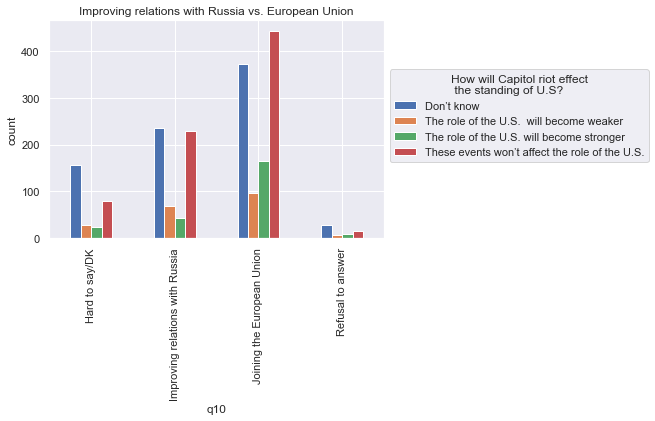

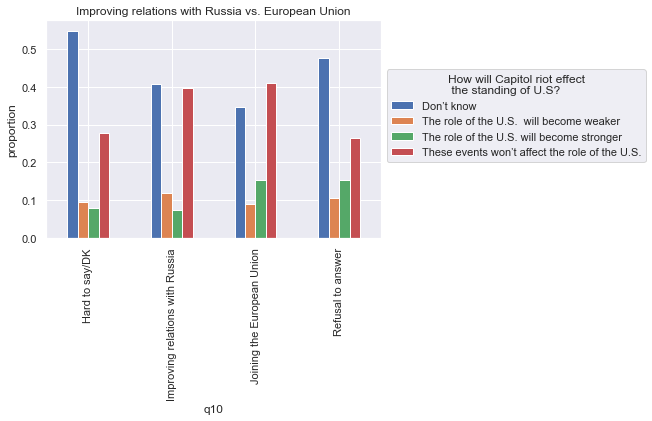

In [32]:
ques_capitol = 'q5'
title = 'How will Capitol riot effect\n the standing of U.S?'

index_name =  ['Don’t know', 'U. S. will become stronger',
                    'U. S. will become weaker', 'Won’t affect the U. S.']

index_order = ['U. S. will become stronger','Won’t affect the U. S.',
                    'U. S. will become weaker',  'Don’t know']

ques_target = 'q10'
title2 = 'Improving relations with Russia vs. European Union'

col_name = ['Hard to say', 'Russia', 'European Union',
           'Refusal to answer']

col_ordered = ['Russia', 'Hard to say', 
                  'European Union', 'Refusal to answer']

plot_2d_breakdown(df, 
          ques_capitol, title, index_name, index_order,
         ques_target, title2, col_name, col_ordered, change_names=False)


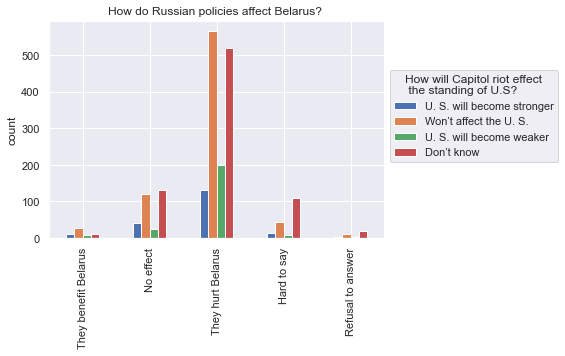

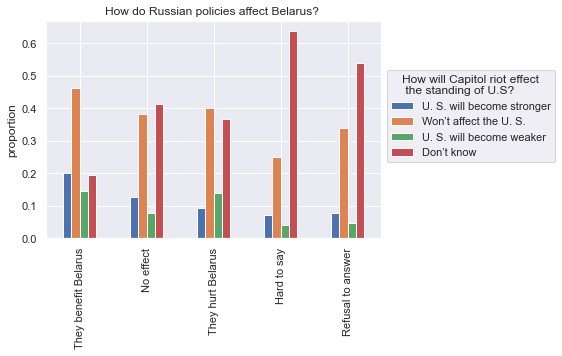

In [33]:
df_d=df.rename(columns = dem_decode)

dem_decode

df_d = (df.groupby(['q5','q9']).sum()["Weight"]).unstack(level=1)

#reorder the columns

df_d.index = ['Don’t know', 'U. S. will become stronger',
                    'U. S. will become weaker', 'Won’t affect the U. S.']

index_order = ['U. S. will become stronger','Won’t affect the U. S.',
                    'U. S. will become weaker',  'Don’t know']

df_d = df_d.loc[index_order]

col_name = ['Hard to say', 'Refusal to answer',
                  'They benefit Belarus', 'No effect',
                  'They hurt Belarus']

df_d.columns = col_name

col_ordered = ['They benefit Belarus', 'No effect',
                  'They hurt Belarus', 'Hard to say', 'Refusal to answer']

df_d = df_d[col_ordered]


#df_d = df_d.T

title2 = 'How do Russian policies affect Belarus? '

df_d.T.plot(kind='bar', stacked=False)
plt.title(title2)
plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
plt.ylabel('count')
plt.show()

df_d_prop = df_d/df_d.sum(0)

df_d_prop.T.plot(kind='bar', stacked=False)
plt.title(title2)
plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
plt.ylabel('proportion')
plt.show()

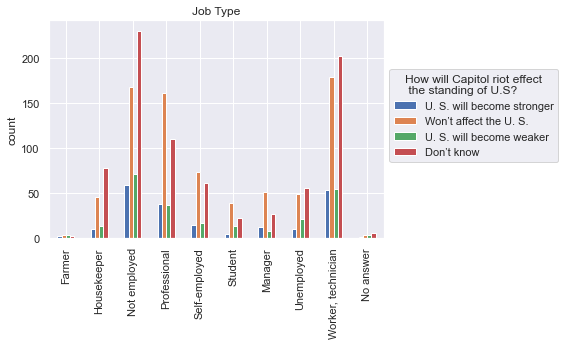

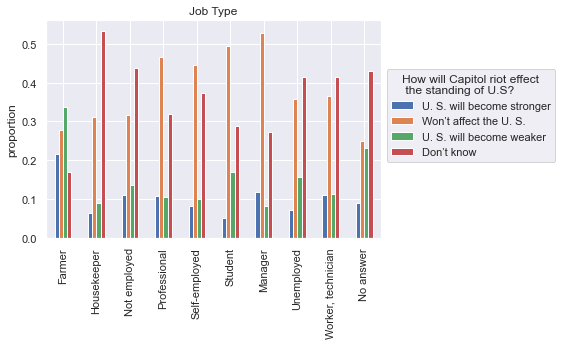

In [34]:
df_d=df.rename(columns = dem_decode)

dem_decode

df_d = (df.groupby(['q5','d7']).sum()["Weight"]).unstack(level=1)

#reorder the columns

df_d.index = ['Don’t know', 'U. S. will become stronger',
                    'U. S. will become weaker', 'Won’t affect the U. S.']

index_order = ['U. S. will become stronger','Won’t affect the U. S.',
                    'U. S. will become weaker',  'Don’t know']

df_d = df_d.loc[index_order]

col_name = ['Farmer','Housekeeper',
                  'No answer', 'Not employed', 'Professional',
                  'Self-employed', 'Student',
                  'Manager', 'Unemployed',
                  'Worker, technician']
df_d.columns = col_name

col_ordered = ['Farmer','Housekeeper', 'Not employed', 'Professional',
                  'Self-employed', 'Student',
                  'Manager', 'Unemployed',
                  'Worker, technician',
                  'No answer']

df_d = df_d[col_ordered]



#df_d = df_d.T

title2 = 'Job Type'

df_d.T.plot(kind='bar', stacked=False)
plt.title(title2)
plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
plt.ylabel('count')
plt.show()

df_d_prop = df_d/df_d.sum(0)

df_d_prop.T.plot(kind='bar', stacked=False)
plt.title(title2)
plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
plt.ylabel('proportion')
plt.show()

In [35]:
ques_capitol = 'q5'
title = 'How will Capitol riot effect\n the standing of U.S?'

index_name = ['Don’t know', 'U. S. will become stronger',
                    'U. S. will become weaker', 'Won’t affect the U. S.']

index_order = ['U. S. will become stronger','Won’t affect the U. S.',
                    'U. S. will become weaker',  'Don’t know']

ques_target = 'q8'
title2 = 'What are your feelings towards the Russian protests?'

col_name = ['Empathy',
                  'Indifference',
                  'Mixed feelings',
                  'No answer',
                  'Support']

col_ordered = ['Indifference','Mixed feelings','Empathy',
                  'Support','No answer']

plot_2d_breakdown(df, 
          ques_capitol, title, index_name, index_order,
         ques_target, title2, col_name, col_ordered, change_names=True)

ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

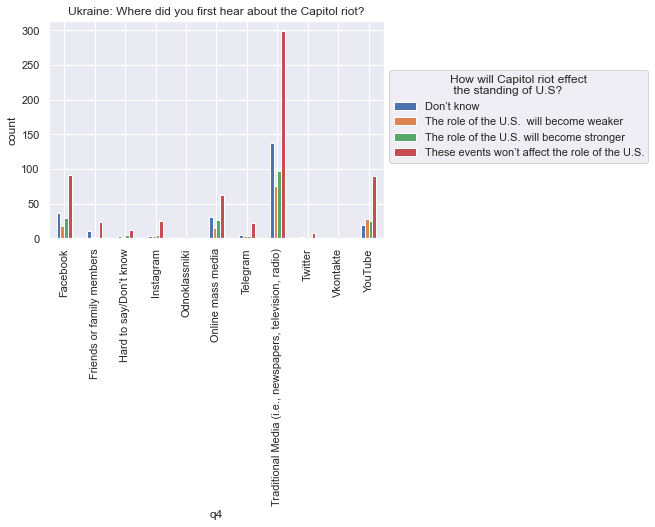

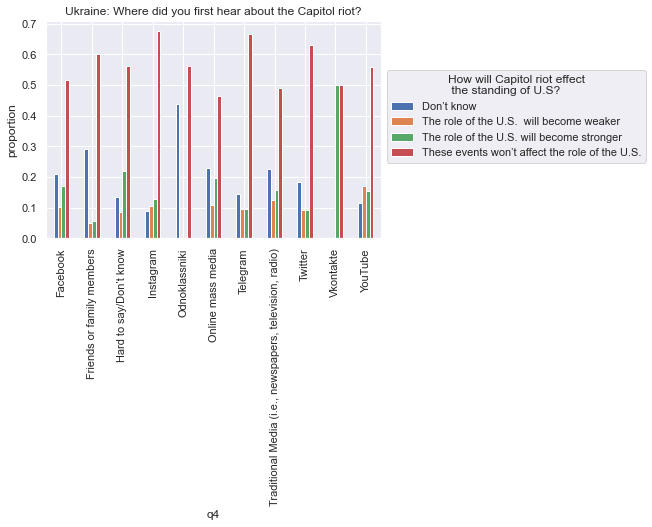

In [36]:
ques_capitol = 'q5'
title = 'How will Capitol riot effect\n the standing of U.S?'

index_name = ['Don’t know', 'U. S. will become stronger',
                    'U. S. will become weaker', 'Won’t affect the U. S.']

index_order = ['U. S. will become stronger','Won’t affect the U. S.',
                    'U. S. will become weaker',  'Don’t know']

ques_target = 'q4'
title2 = 'Ukraine: Where did you first hear about the Capitol riot?'

col_name = ['djub','djub2','Online mass media', 'Telegram',
                  'Facebook', 'Instagram',
                  'Odnoklassniki', 'Twitter',
                  'Vkontakte', 'YouTube',
                  'Traditional Media']

col_ordered = ['Traditional Media', 'Online mass media', 'YouTube', 'Telegram',
                  'Facebook', 'Instagram',
                  'Odnoklassniki', 'Twitter',
                  'Vkontakte']

plot_2d_breakdown(df, 
          ques_capitol, title, index_name, index_order,
         ques_target, title2, col_name, col_ordered, change_names=False)

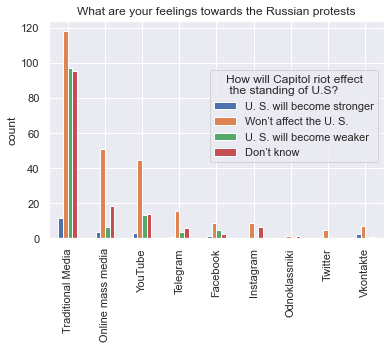

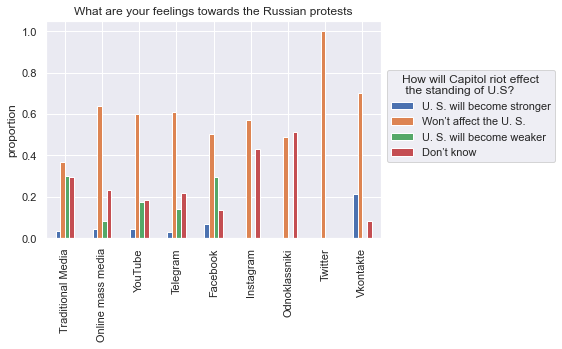

In [69]:
df_d=df.rename(columns = dem_decode)

dem_decode

df_d = (df.groupby(['q5','q4']).sum()["Weight"]).unstack(level=1)

#reorder the columns

df_d.index = ['Don’t know', 'U. S. will become stronger',
                    'U. S. will become weaker', 'Won’t affect the U. S.']

index_order = ['U. S. will become stronger','Won’t affect the U. S.',
                    'U. S. will become weaker',  'Don’t know']

df_d = df_d.loc[index_order]

col_name = ['djub','djub2','Online mass media', 'Telegram',
                  'Facebook', 'Instagram',
                  'Odnoklassniki', 'Twitter',
                  'Vkontakte', 'YouTube',
                  'Traditional Media']
df_d.columns = col_name

col_ordered = ['Traditional Media', 'Online mass media', 'YouTube', 'Telegram',
                  'Facebook', 'Instagram',
                  'Odnoklassniki', 'Twitter',
                  'Vkontakte']

df_d = df_d[col_ordered]

#df_d = df_d.T

title2 = 'What are your feelings towards the Russian protests'

df_d.T.plot(kind='bar', stacked=False)
plt.title(title2)
plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
plt.ylabel('count')
plt.show()

df_d_prop = df_d/df_d.sum(0)

df_d_prop.T.plot(kind='bar', stacked=False)
plt.title(title2)
plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
plt.ylabel('proportion')
plt.show()

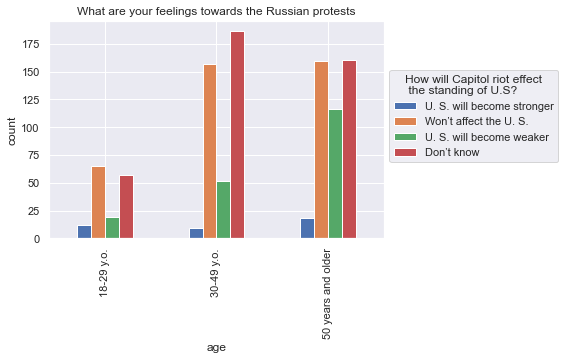

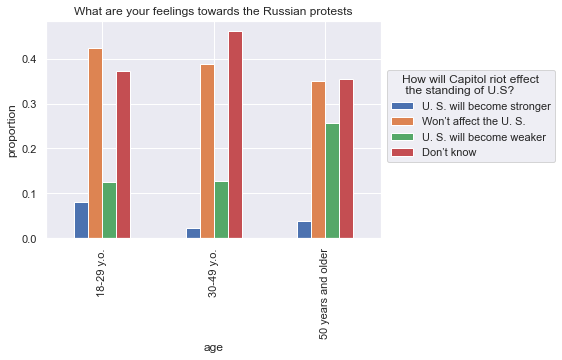

In [71]:
df_d=df.rename(columns = dem_decode)

dem_decode

df_d = (df.groupby(['q5','age']).sum()["Weight"]).unstack(level=1)

#reorder the columns

df_d.index = ['Don’t know', 'U. S. will become stronger',
                    'U. S. will become weaker', 'Won’t affect the U. S.']

index_order = ['U. S. will become stronger','Won’t affect the U. S.',
                    'U. S. will become weaker',  'Don’t know']

df_d = df_d.loc[index_order]

col_name = ['djub','djub2','Online mass media', 'Telegram',
                  'Facebook', 'Instagram',
                  'Odnoklassniki', 'Twitter',
                  'Vkontakte', 'YouTube',
                  'Traditional Media']
#df_d.columns = col_name

col_ordered = ['Traditional Media', 'Online mass media', 'YouTube', 'Telegram',
                  'Facebook', 'Instagram',
                  'Odnoklassniki', 'Twitter',
                  'Vkontakte']

#df_d = df_d[col_ordered]

#df_d = df_d.T

title2 = 'What are your feelings towards the Russian protests'

df_d.T.plot(kind='bar', stacked=False)
plt.title(title2)
plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
plt.ylabel('count')
plt.show()

df_d_prop = df_d/df_d.sum(0)

df_d_prop.T.plot(kind='bar', stacked=False)
plt.title(title2)
plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
plt.ylabel('proportion')
plt.show()

What are your major sources of information: National Mass Media
What are your major sources of information: Social Media
What are your major sources of information: Russian Media
What are your major sources of information: National Digital media
What are your major sources of information: Russian Digital media
What are your major sources of information: People you Know
What are your major sources of information: Other Sources


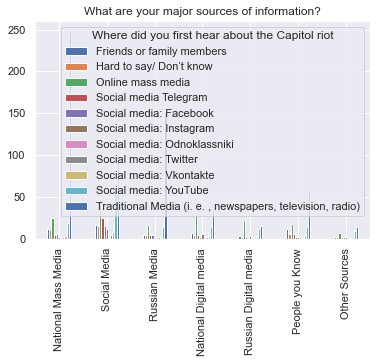

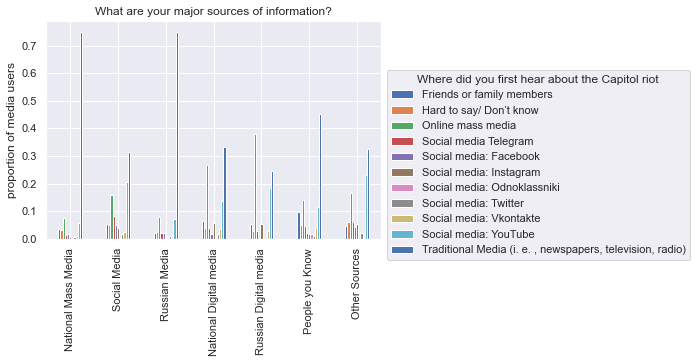

In [7]:
ques_capitol = 'q4'
title = 'Where did you first hear about the Capitol riot'

df = df.rename(columns=normal_media_consumption)

#remove "hard to say" and "refuse to answer"
media_q = list(normal_media_consumption.values())[:-2]

df_new_l = []
for q in media_q:
    print(q)
    df1 = df[df[q] == 'Mentioned'].groupby([ques_capitol]).sum()
    
    #print(df1['Weight'])
    
    df_new_l.append(df1['Weight'])
    
media_q_short = [m[m.find(':')+2:] for m in media_q]

df_capitol = pd.concat(df_new_l,1)
df_capitol.columns = media_q_short
#df_capitol.index = ['Don’t know', 'U. S. will become stronger',
#                    'U. S. will become weaker', 'Won’t affect the U. S.']

#print(df_capitol/df_capitol.sum())

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df_capitol.T.plot(kind='bar', stacked=False)
plt.title('What are your major sources of information?')
plt.legend(title=title)
plt.show()



df_capitol_norm = df_capitol/df_capitol.sum()

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df_capitol_norm.T.plot(kind='bar', stacked=False)
plt.title('What are your major sources of information?')
plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
plt.ylabel('proportion of media users')
plt.show()

In [18]:
ques_capitol = 'q5'
title = 'How will Capitol riot effect\n the standing of U.S?'

df=df[df['q5'].isin(
    ['These events won’t affect the role of the U. S.',
     'The role of the U. S. will become weaker'])]

df = df.rename(columns=normal_media_consumption)

#remove "hard to say" and "refuse to answer"
media_q = list(normal_media_consumption.values())[:-2]

df_new_l = []
for q in media_q:
    print(q)
    df1 = df[df[q] == 'Mentioned'].groupby([ques_capitol]).sum()
    
    #print(df1['Weight'])
    
    df_new_l.append(df1['Weight'])
    
media_q_short = [m[m.find(':')+2:] for m in media_q]

df_capitol = pd.concat(df_new_l,1)
df_capitol.columns = media_q_short
#df_capitol.index = ['Don’t know', 'U. S. will become stronger',
#                    'U. S. will become weaker', 'Won’t affect the U. S.']

df_capitol.index = ['U. S. will become weaker', 'Won’t affect the U. S.']


import seaborn as sns
import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
sns.set()

df_capitol.T.plot(kind='bar', stacked=False)
plt.title('What are your major sources of information?')
plt.legend( title=title)
plt.show()



#remove don't knows and normalzie
df_capitol_dontknow_removed = df_capitol#.loc[df_capitol.index.values[1:]]
df_capitol_dontknow_removed_normalized = df_capitol_dontknow_removed/df_capitol_dontknow_removed.sum()

import seaborn as sns
import matplotlib.pyplot as plt

#fig, ax = plt.subplots()
sns.set()

df_capitol_dontknow_removed_normalized.T.plot(kind='bar', stacked=False)
plt.title('What are your major sources of information?')
plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
plt.ylabel('proportion of media users')
plt.show()

What are your major sources of information: National Mass Media
What are your major sources of information: Social Media
What are your major sources of information: Russian Media
What are your major sources of information: National Digital media
What are your major sources of information: Russian Digital media
What are your major sources of information: People you Know
What are your major sources of information: Other Sources


ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

In [19]:

df_capitol

,National Mass Media,Social Media,Russian Media,National Digital media,Russian Digital media,People you Know,Other Sources
q5,,,,,,,
Don’t know,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The role of the U. S. will become stronger,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The role of the U. S. will become weaker,124.635747,77.954200,79.924334,27.297094,12.524812,35.926578,11.656899
These events won’t affect the role of the U. S.,169.817505,228.782835,99.668311,84.750965,44.401147,92.894685,30.142130


What are your major sources of information: National Mass Media
What are your major sources of information: Social Media
What are your major sources of information: Russian Media
What are your major sources of information: National Digital media
What are your major sources of information: Russian Digital media
What are your major sources of information: People you Know
What are your major sources of information: Other Sources


/Library/Python/3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



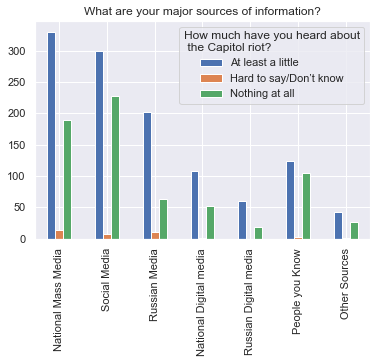

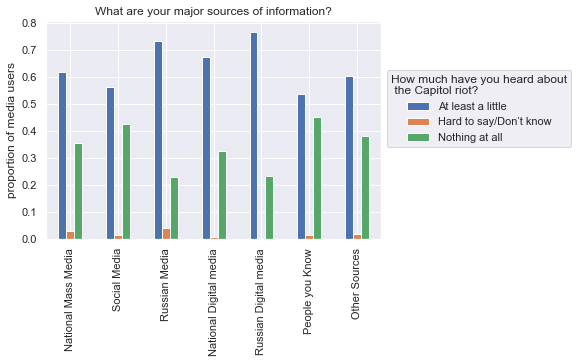

In [19]:

ques_capitol = 'q3'
title = 'How much have you heard about\n the Capitol riot?'

df = df.rename(columns=normal_media_consumption)

## comment bottom line to NOT combine a little and a lot
q3 = df['q3'].astype(str)
q3[q3 == 'A little'] = 'At least a little'
q3[q3 == 'A lot'] = 'At least a little'
df['q3'] = q3

#remove "hard to say" and "refuse to answer"
media_q = list(normal_media_consumption.values())[:-2]

df_new_l = []
for q in media_q:
    print(q)
    df1 = df[df[q] == 'Mentioned'].groupby([ques_capitol]).sum()
    
    #print(df1['Weight'])
    
    df_new_l.append(df1['Weight'])
    
media_q_short = [m[m.find(':')+2:] for m in media_q]

df_capitol = pd.concat(df_new_l,1)
df_capitol.columns = media_q_short
#df_capitol.index = ['Don’t know', 'U. S. will become stronger',
#                    'U. S. will become weaker', 'Won’t affect the U. S.']

#print(df_capitol/df_capitol.sum())

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df_capitol.T.plot(kind='bar', stacked=False)
plt.title('What are your major sources of information?')
plt.legend(title=title)
plt.show()



df_capitol_norm = df_capitol/df_capitol.sum()

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df_capitol_norm.T.plot(kind='bar', stacked=False)
plt.title('What are your major sources of information?')
plt.legend(title=title,bbox_to_anchor=(1.0, 0.8))
plt.ylabel('proportion of media users')
plt.show()


In [9]:
df_capitol

,National Mass Media,Social Media,Russian Media,National Digital media,Russian Digital media,People you Know,Other Sources
q3,,,,,,,
A little,248.138842,218.401096,139.429593,75.154861,40.849313,99.696706,24.688782
A lot,82.609339,81.254665,63.255658,32.403817,19.582901,25.071878,17.421591
Hard to say/Don’t know,14.628609,7.148572,10.458670,0.878571,0.000000,3.203272,1.118110
Nothing at all,190.056851,227.331257,63.136263,51.843793,18.368903,105.111556,26.460460


0             A little
1       Nothing at all
2       Nothing at all
3             A little
4       Nothing at all
             ...      
1009             A lot
1010             A lot
1011    Nothing at all
1012          A little
1013             A lot
Name: q3, Length: 1014, dtype: category
Categories (4, object): [A little, A lot, Hard to say/Don’t know, Nothing at all]

In [38]:
dependent = 'q3'
independent = 'q4'

df_group = (df.groupby([dependent, independent], as_index=False).sum())

print(df_group)

labels = list(df[independent].unique())
print(labels)

group_values = []
for l in labels:
    print(l)


                        q3                                                 q4  \
0                 A little                          Friends or family members   
1                 A little                            Hard to say/ Don’t know   
2                 A little                                  Online mass media   
3                 A little                              Social media Telegram   
4                 A little                             Social media: Facebook   
5                 A little                            Social media: Instagram   
6                 A little                        Social media: Odnoklassniki   
7                 A little                              Social media: Twitter   
8                 A little                            Social media: Vkontakte   
9                 A little                              Social media: YouTube   
10                A little  Traditional Media (i. e. , newspapers, televis...   
11                   A lot  

ValueError: shape mismatch: objects cannot be broadcast to a single shape

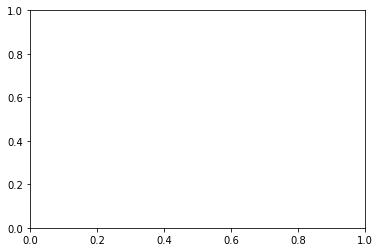

In [21]:
import matplotlib.pyplot as plt
import numpy as np



dependent = 'q'
independent = 'q4'


labels = df[dependent].unique()



df_group = df.groupby([dependent, independent]).sum()['Weight']



men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars




fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [20]:
#df.groupby('q4').count()



id  \
q5                                              q4                                                             
Don’t know                                      Friends or family members                            30045.0   
                                                Hard to say/ Don’t know                              41115.0   
                                                Online mass media                                    63443.0   
                                                Social media Telegram                                26253.0   
                                                Social media: Facebook                                8741.0   
                                                Social media: Instagram                              26723.0   
                                                Social media: Odnoklassniki                           5062.0   
                                                Social media: Twitter                                    NaN   
                                                Social media: Vkontakte                               4406.0   
                                                Social media: YouTube                                49152.0   
                                                Traditional Media (i. e. , newspapers, televisi...  313529.0   
The role of the U. S. will become stronger      Friends or family members                             3967.0   
                                                Hard to say/ Don’t know                                  NaN   
                                                Online mass media                                    15436.0   
                                                Social media Telegram                                 4046.0   
                                                Social media: Facebook                                 845.0   
                                                Social media: Instagram                                  NaN   
                                                Social media: Odnoklassniki                              NaN   
                                                Social media: Twitter                                    NaN   
                                                Social media: Vkontakte                               7757.0   
                                                Social media: YouTube                                 8396.0   
                                                Traditional Media (i. e. , newspapers, televisi...   31252.0   
The role of the U. S. will become weaker        Friends or family members                             5914.0   
                                                Hard to say/ Don’t know                               5545.0   
                                                Online mass media                                    24257.0   
                                                Social media Telegram                                12493.0   
                                                Social media: Facebook                                9055.0   
                                                Social media: Instagram                                  NaN   
                                                Social media: Odnoklassniki                              NaN   
                                                Social media: Twitter                                    NaN   
                                                Social media: Vkontakte                                  NaN   
                                                Social media: YouTube                                38118.0   
                                                Traditional Media (i. e. , newspapers, televisi...  328786.0   
These events won’t affect the role of the U. S. Friends or family members                            36045.0   
                                                Hard to say/ Don’t know   

In [53]:
df[(df['q3'] == 'Nothing at all')]['q4']

1       NaN
2       NaN
4       NaN
8       NaN
9       NaN
       ... 
1003    NaN
1004    NaN
1006    NaN
1008    NaN
1011    NaN
Name: q4, Length: 390, dtype: category
Categories (11, object): [Friends or family members, Hard to say/ Don’t know, Online mass media, Social media Telegram, ..., Social media: Twitter, Social media: Vkontakte, Social media: YouTube, Traditional Media (i. e. , newspapers, televis...]